# EDA - ECOMMERCE DATASET

The superstore dataset was downloaded from Kaggle and the Python libraries used on this project were Pandas, Matplotlib and Seaborn

The aim of this project is to provide an in-depth analysis of this data and to answer the following questions:

· What sub-categories generate the most/least revenue and profit?

· What products are the most/least profitable?

· What states generate the most sales and profit?



### DATA CLEANING

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset as pandas dataframe

df = pd.read_csv(r"C:\Users\Admin\EDA-E-commerce Dataset\Superstore.csv", encoding = "latin")
#review first 5 rows
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
#shape of dataframe

df.shape

(9994, 21)

In [4]:
#get data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

There are 9,994 rows including the header and 19 columns. The data type is correct and matches the corresponding values.

In [5]:
# check for null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Find NAN
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


The results show that the dataset does not have any null or NAN values.

In [7]:
# check for duplicate values and remove them
df.duplicated().sum() 

0

In [8]:
# create new column for profit margin
df['Profit Margin']=(df.Profit/df.Sales)*100
# confirm new column has been added
df.columns 

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit Margin'],
      dtype='object')

### Exploratory Data Analysis

1. What (Sub)Categories generate the most/least revenue and profit?

In [9]:
# Group subcategory by sales, profit and quantity
subcat= pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit', 'Quantity']].sum())
subcat.reset_index(inplace = True)
subcat['sale_contribution'] = subcat['Sales']/(subcat['Sales'].sum())
subcat_sale = subcat[['Sub-Category', 'Sales']].sort_values('Sales', ascending = False)
subcat_profit = subcat[['Sub-Category', 'Profit']].sort_values('Profit', ascending = False)
subcat_quantity = subcat[['Sub-Category','Quantity']].sort_values('Quantity', ascending = False)
subcat

,Sub-Category,Sales,Profit,Quantity,sale_contribution
0,Accessories,167380.3180,41936.6357,2976,0.072863
1,Appliances,107532.1610,18138.0054,1729,0.046810
2,Art,27118.7920,6527.7870,3000,0.011805
3,Binders,203412.7330,30221.7633,5974,0.088548
4,Bookcases,114879.9963,-3472.5560,868,0.050009
5,Chairs,328449.1030,26590.1663,2356,0.142978
6,Copiers,149528.0300,55617.8249,234,0.065091
7,Envelopes,16476.4020,6964.1767,906,0.007172
8,Fasteners,3024.2800,949.5182,914,0.001317
9,Furnishings,91705.1640,13059.1436,3563,0.039920


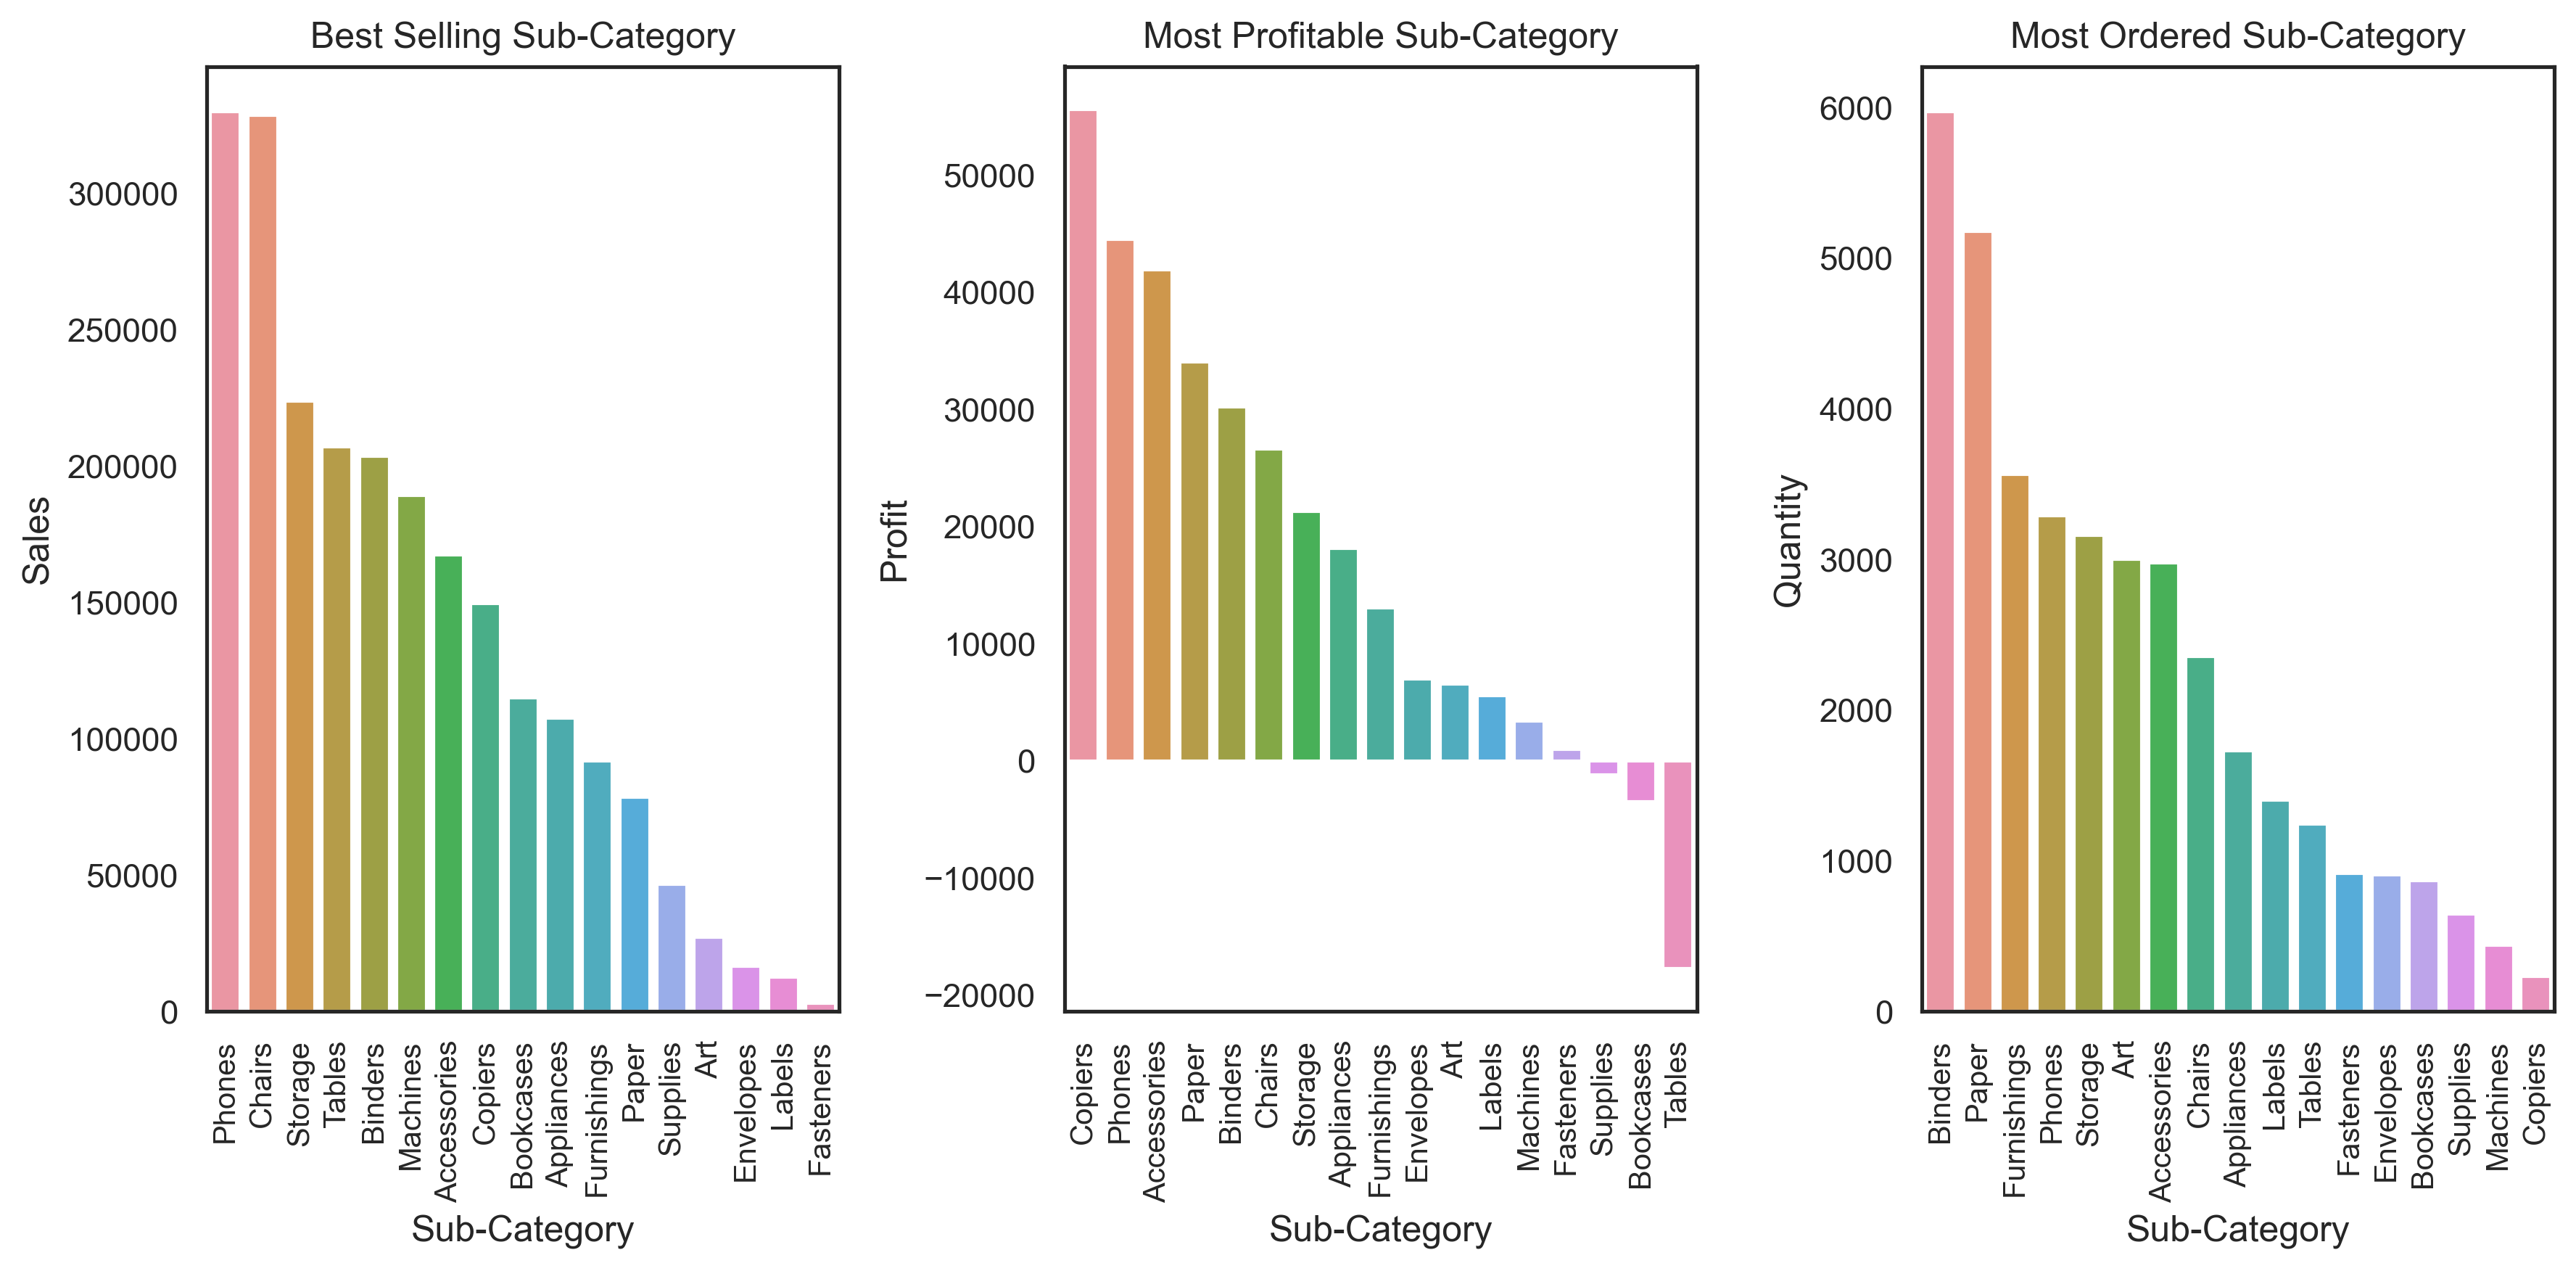

In [10]:
# Plot Bar Plots
sns.set_theme(style="white")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 3,  figsize=(12, 6), dpi = 300)

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sale, x = subcat_sale['Sub-Category'], y = subcat_sale['Sales'], ax=axis[0] )
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit['Sub-Category'], y = subcat_profit['Profit'], ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Ordered Sub-Category
subcat3 = sns.barplot(data = subcat_quantity, x = subcat_quantity['Sub-Category'], y = subcat_quantity['Quantity'], ax=axis[2])
subcat3.set(title = "Most Ordered Sub-Category")
subcat3.set_xticklabels(subcat3.get_xticklabels(),rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()
plt.show()

-Phones and Chairs generated the most revenue, both accounting for 29% of the Total Sales. Fasteners and Labels generated the least revenue.

-The least profitable sub-category is Tables with a net loss of ($18,000). It’s important to note that loss-making sales like Tables, Bookcases and Supplies make up 16% of total sales.

-60% of all orders are for Office Supplies and 26% of those are for Binders.

2) What products are the most/least profitable?

In [11]:
#Group Products by Profit

product_profit_top = pd.DataFrame(df.groupby('Product Name')['Profit'].sum().nlargest(3)).reset_index()
product_profit_bottom = pd.DataFrame(df.groupby('Product Name')['Profit'].sum().nsmallest(3)).reset_index()

product_profit = pd.concat([product_profit_top, product_profit_bottom])
product_profit = pd.DataFrame(product_profit)
# #Group Products by Sales
product_sale_top = pd.DataFrame(df.groupby('Product Name')['Sales'].sum().nlargest(3)).reset_index()
product_sale_bottom = pd.DataFrame(df.groupby('Product Name')['Sales'].sum().nsmallest(3)).reset_index()
product_sale = pd.concat([product_sale_top, product_sale_bottom])
product_sale = pd.DataFrame(product_sale)


[Text(0.5, 1.0, 'Top and Bottom Product(Profit)')]

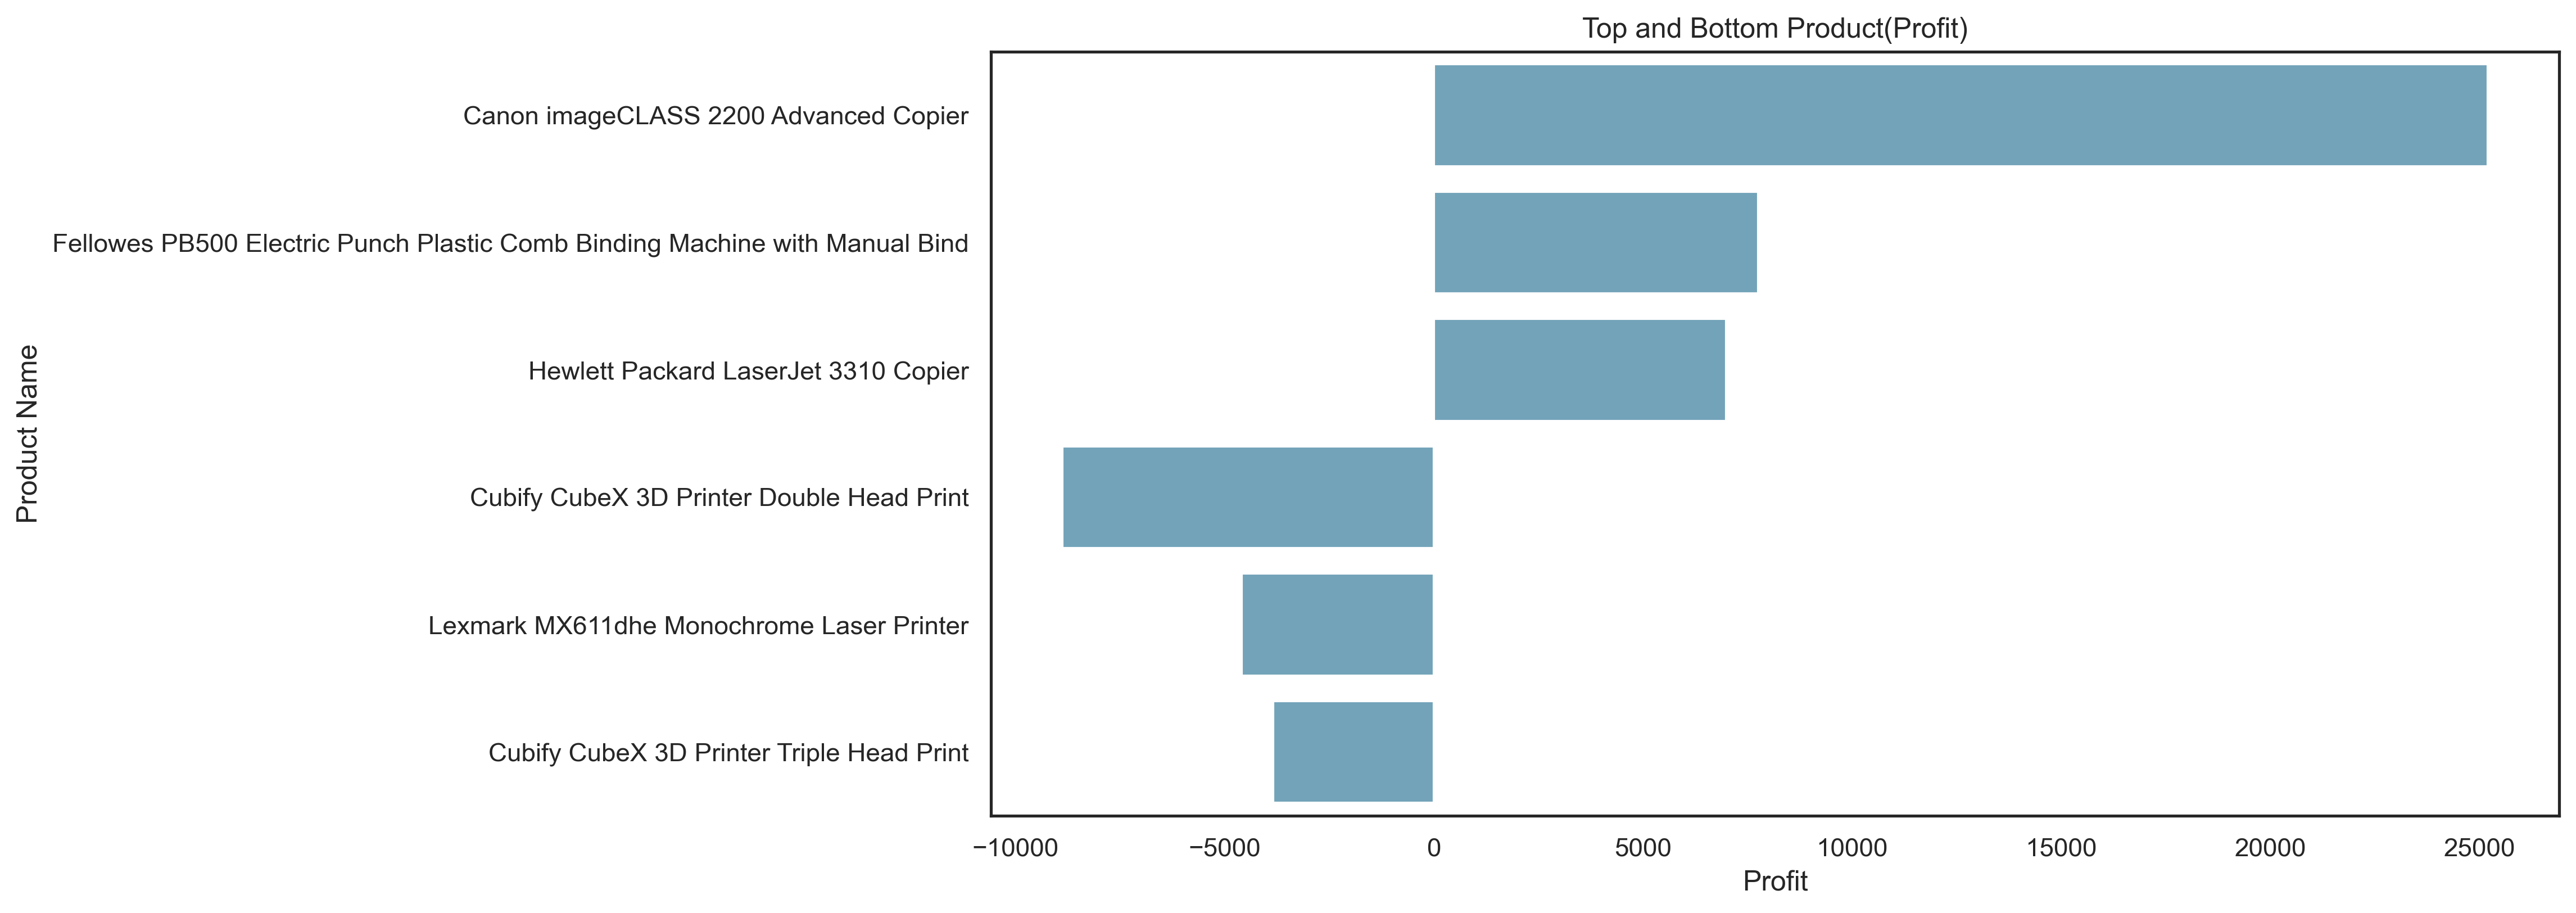

In [18]:

# Plot Bar Plots
sns.set_theme(style="white")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure = plt.subplots(figsize=(12, 6), dpi = 300)

product_profit_chart = sns.barplot(data = product_profit, x = product_profit['Profit'], y = product_profit['Product Name'],color ='#66a7c5')
product_profit_chart.set(title ='Top and Bottom Product(Profit)')
# product_profit_chart.set_xticklables(product_profit_chart.set_xticklabels(), rotation = 'horizonal', size = 15)




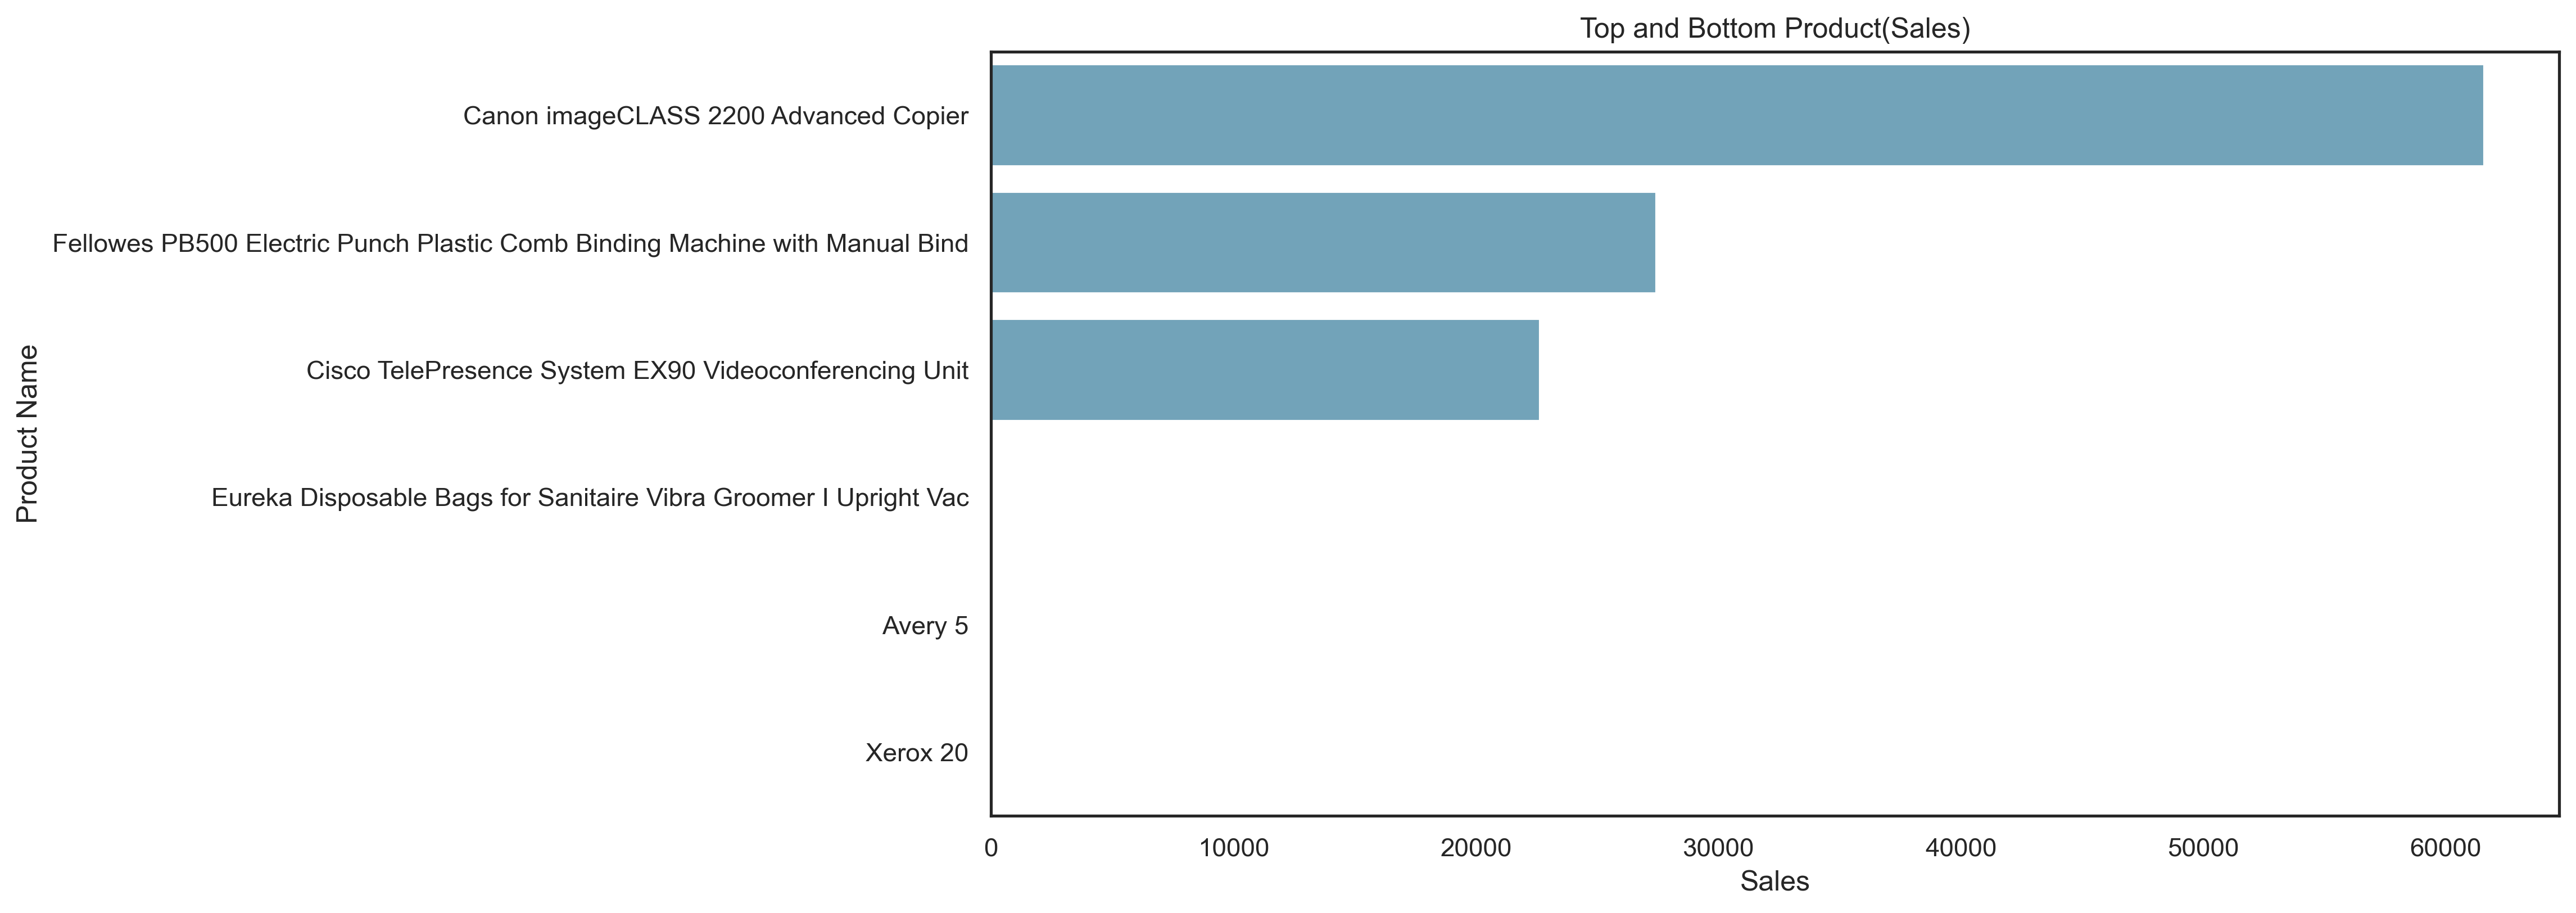

In [20]:

# Plot Bar Plots
sns.set_theme(style="white")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure = plt.subplots(figsize=(12, 6), dpi = 300)

product_sale_chart = sns.barplot(data = product_sale, x = product_sale['Sales'], y = product_sale['Product Name'], color ='#66a7c5' )
product_sale_chart.set(title ='Top and Bottom Product(Sales)')


plt.show()
# Set spacing between subplots

Canon ImageClass Copier is the best-selling and most profitable product while Cubify CubeX 3D Printers and Lexmark Laser Printer are the least profitable.

In [22]:
#Group States by Profit

state_profit_top = pd.DataFrame(df.groupby('State')['Profit'].sum().nlargest(3)).reset_index()
state_profit_bottom = pd.DataFrame(df.groupby('State')['Profit'].sum().nsmallest(3)).reset_index()

state_profit = pd.concat([state_profit_top, state_profit_bottom])
state_profit = pd.DataFrame(state_profit)
# #Group Products by Sales
state_sale_top = pd.DataFrame(df.groupby('State')['Sales'].sum().nlargest(3)).reset_index()
state_sale_bottom = pd.DataFrame(df.groupby('State')['Sales'].sum().nsmallest(3)).reset_index()
state_sale = pd.concat([state_sale_top, state_sale_bottom])
state_sale = pd.DataFrame(state_sale)


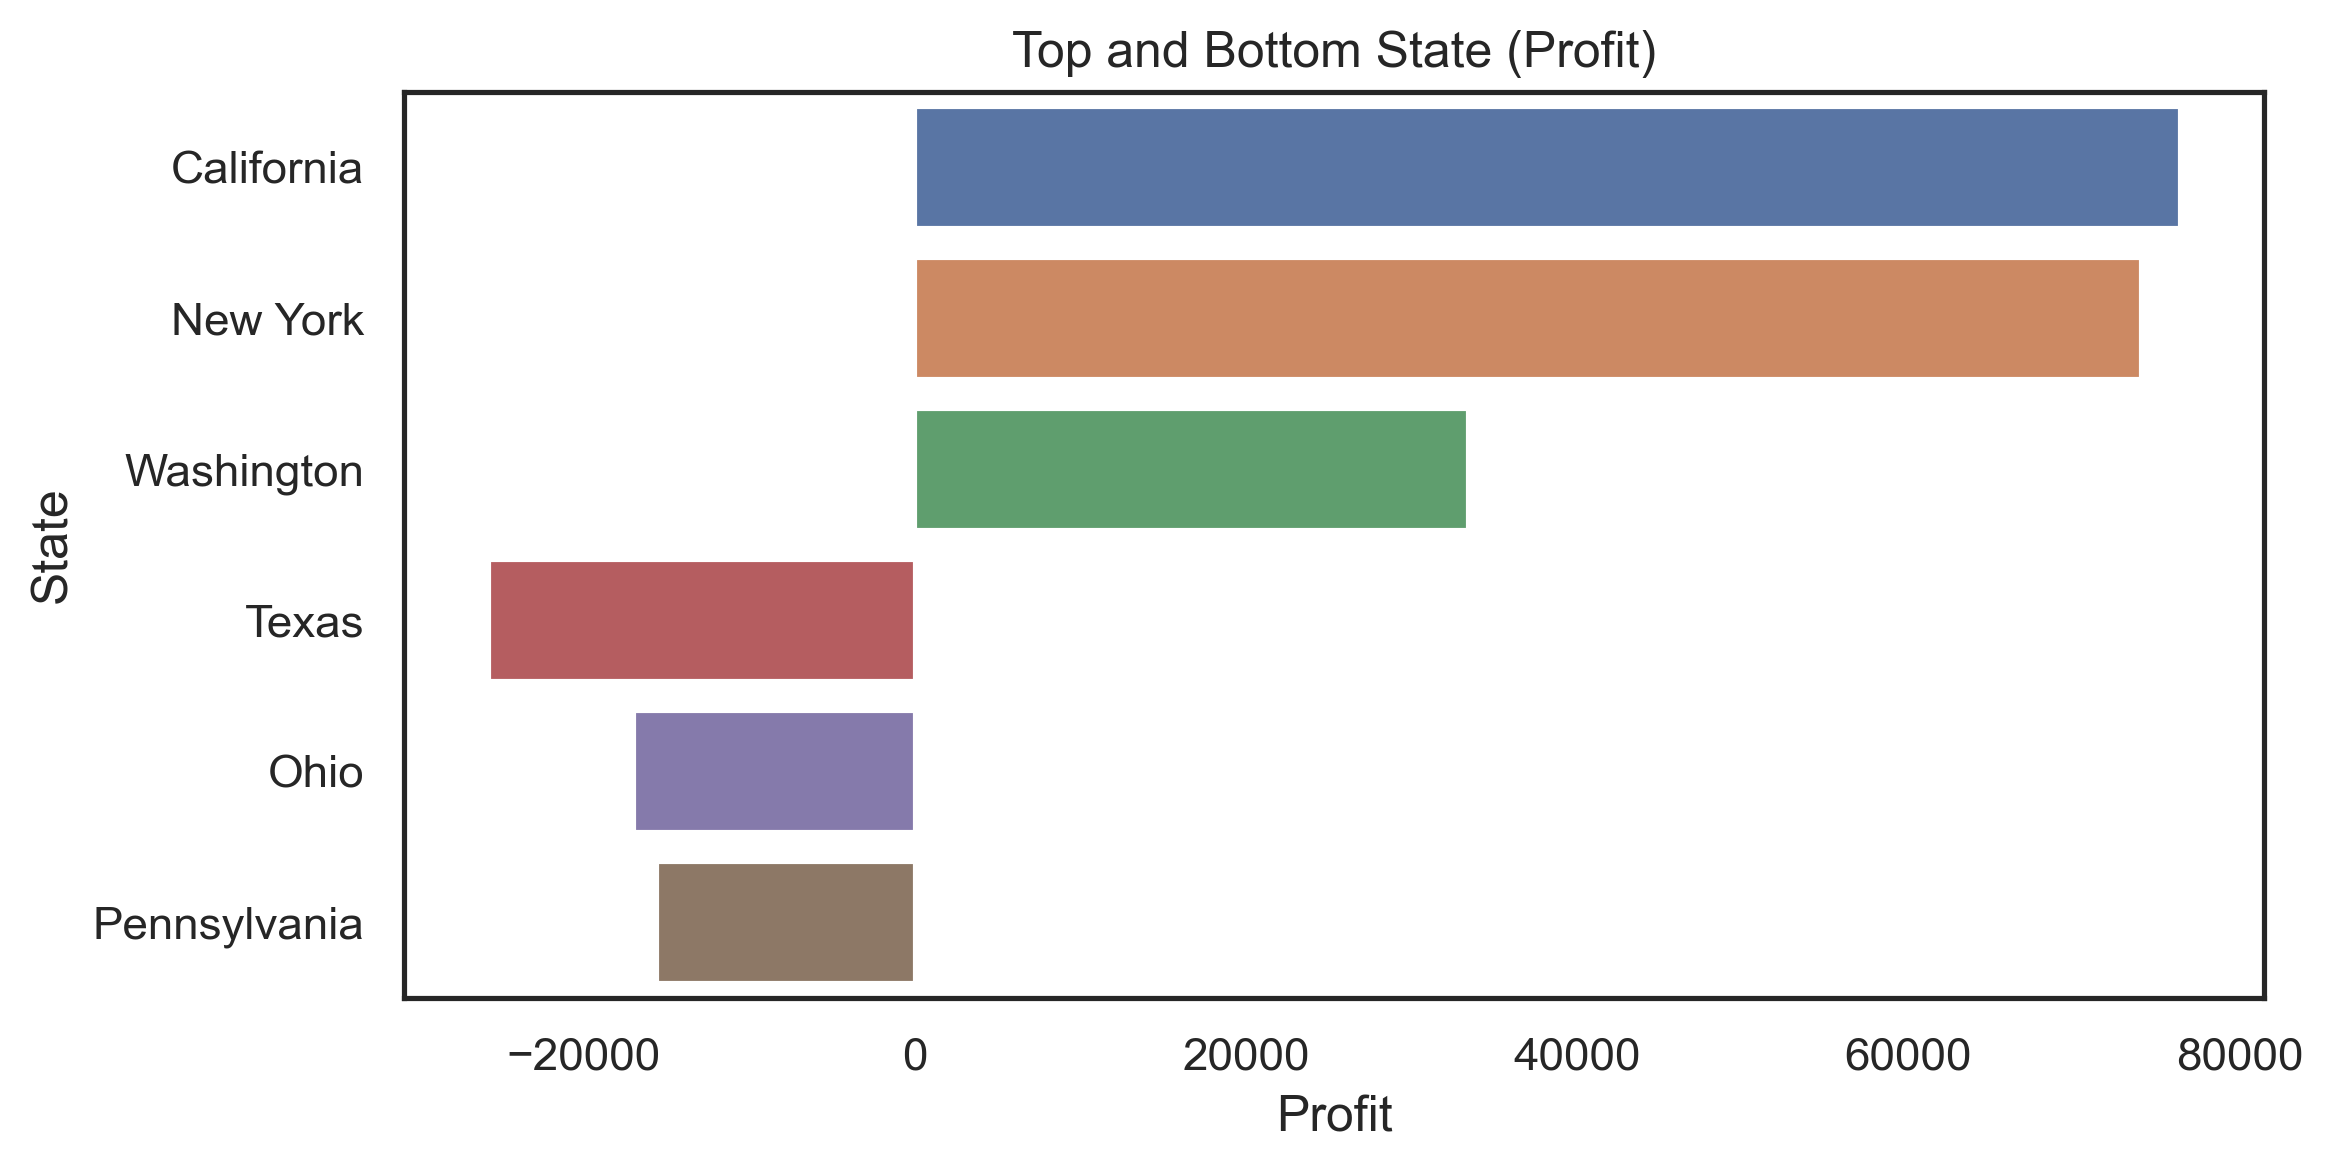

In [23]:

# Plot Bar Plots
sns.set_theme(style="white")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure = plt.subplots(figsize=(8, 4), dpi = 300)

state_profit_chart = sns.barplot(data = state_profit, x = state_profit['Profit'], y = state_profit['State'])
state_profit_chart.set(title ='Top and Bottom State (Profit)')


plt.show()
# Set spacing between subplots

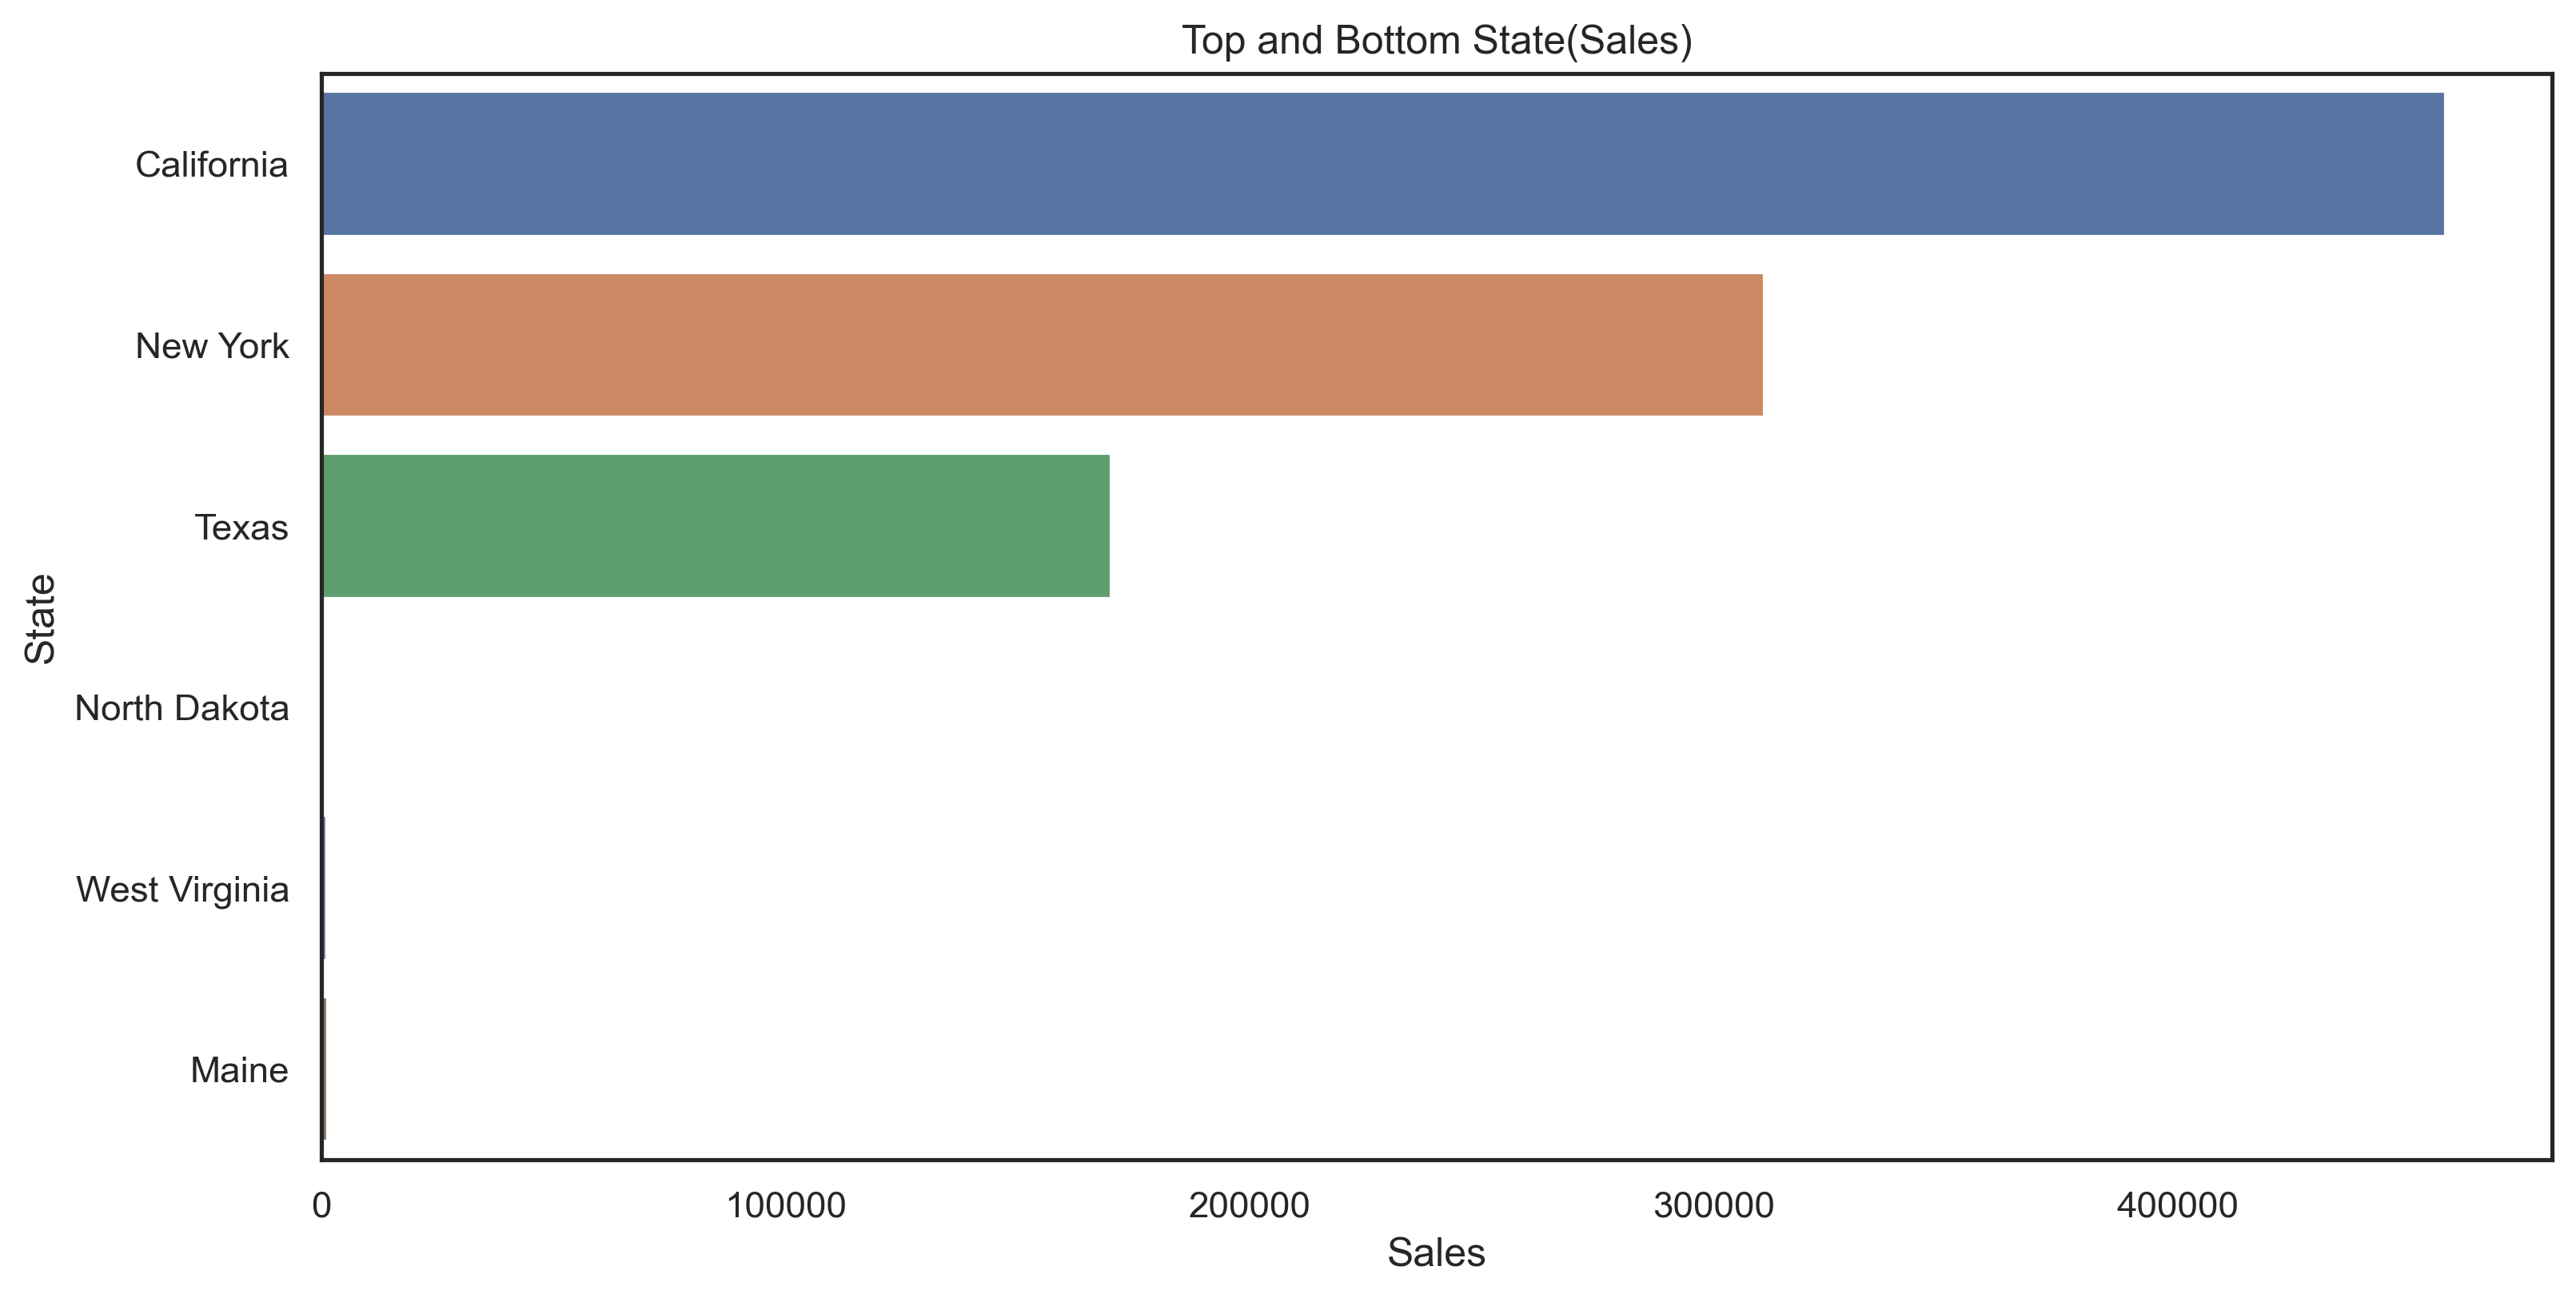

In [24]:
# Plot Bar Plots
sns.set_theme(style="white")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure = plt.subplots(figsize=(12, 6), dpi = 300)

state_sale_chart = sns.barplot(data = state_sale, x = state_sale['Sales'], y = state_sale['State'] )
state_sale_chart.set(title ='Top and Bottom State(Sales)')


plt.show()
# Set spacing between subplots

-California and New York had the highest sales and profit, accounting for 64% of Superstore’s total sales and 66% of Superstore’s total profit.

-The states with the least profit are North Dakota and West Virginia.